In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('crop_recommendation1.csv')
df1.head()

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,30
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,30
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,30
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,30
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,30


In [3]:
df1.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture
1002,108,92,53,27.400536,82.962213,6.276800,104.937800,banana,40
904,0,27,38,22.445813,89.901470,6.738016,109.390600,pomegranate,30
1417,110,14,51,27.024151,91.667376,6.085445,21.260350,muskmelon,30
1957,129,47,20,24.412123,80.803438,6.281914,98.604574,cotton,70
228,54,77,85,17.141861,17.066243,7.829211,83.746067,chickpea,60
1850,14,23,25,26.185524,96.966379,5.612123,135.418622,coconut,45
594,35,52,15,28.698413,61.147544,9.935091,65.675918,mothbeans,30
1328,112,28,54,24.860946,85.053186,6.738031,55.295635,watermelon,70
398,27,63,19,20.934099,21.189301,5.562202,133.191442,kidneybeans,45
78,77,36,37,26.884449,81.460337,6.136132,194.576656,rice,30


In [4]:
df1.shape

(2200, 9)

In [6]:
df1['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df1['label'].value_counts()

rice           100
banana         100
jute           100
coffee         100
lentil         100
mungbean       100
mango          100
coconut        100
grapes         100
watermelon     100
maize          100
blackgram      100
cotton         100
papaya         100
pomegranate    100
pigeonpeas     100
apple          100
orange         100
kidneybeans    100
muskmelon      100
mothbeans      100
chickpea       100
Name: label, dtype: int64

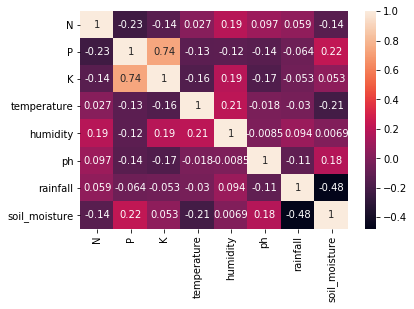

In [9]:
sns.heatmap(df1.corr(),annot=True)

In [10]:
features = df1[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall','soil_moisture']]
target = df1['label']
labels = df1['label']

In [11]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [12]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state = 2)

In [13]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      1.00      1.00        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
    

In [14]:
# Cross validation score (Random Forest)
from sklearn.model_selection import cross_val_score
score = cross_val_score(RF,features,target,cv=5)
score

array([1.        , 1.        , 1.        , 1.        , 0.99772727])

In [15]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [19]:
df1.sample(2)

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture
731,25,65,21,33.863512,68.592323,6.880246,69.244641,blackgram,60
1522,2,143,196,22.712713,90.452617,5.669489,109.885260,apple,50


In [21]:
data = np.array([[24,18, 30, 23.603016, 60.3, 6.7, 120.91,70]])
prediction = RF.predict(data)
print(prediction)

['coconut']


In [35]:
df1.describe()


,N,P,K,temperature,humidity,ph,rainfall,soil_moisture
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,46.363636
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,20.352835
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,15.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,30.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,45.000000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,60.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,90.000000


In [53]:
max(df1['soil_moisture'])
#max(df1['K'])

90